In [164]:
import numpy as np
import tensorflow as tf
import gpflow
import matplotlib.pyplot as plt
from math import sin
np.random.seed(1976)
tf.random.set_seed(1976)

In [165]:
X_c=np.array([[0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9],[1]])
X_e=np.array([[0],[0.4],[0.6],[1]])
X_test=np.array([[0.5],[0.7]])
X_best=np.array([[0.1]])

In [166]:
L=2
def fe(x):
    return(6*x-2)*(6*x-2)*tf.sin(12*x-4)
def fc(x):
    return(1/2*fe(x)+10*(x-1/2)-5)

In [167]:
## je dois definir l"observateur
## je vais definir un observateur pour chaque fidelite \
from trieste.data import Dataset
OBJECTIVE = "OBJECTIVE"
def observer_e(query_points_e):
    return {
        OBJECTIVE: Dataset(query_points_e, fe(query_points_e))
    }

In [168]:
def observer_c(query_points_c ):
    return {
        OBJECTIVE: Dataset(query_points_c, fc(query_points_c))
    }

In [169]:
num_initial_points_e=4
num_initial_points_c=11
initial_data_c = observer_c(X_c)
initial_data_e = observer_e(X_e)


In [170]:
from trieste.space import Box
search_space = Box([0],[1])

In [171]:
List=np.arange(0,1,0.001)

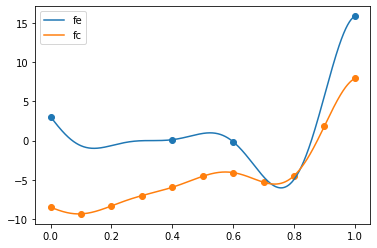

In [172]:
plt.plot(List,fe(List), label='fe')
plt.plot(List,fc(List), label='fc')
plt.scatter(initial_data_e[OBJECTIVE].query_points,initial_data_e[OBJECTIVE].observations)
plt.scatter(initial_data_c[OBJECTIVE].query_points,initial_data_c[OBJECTIVE].observations)
plt.legend()

## Building  the coarse model 



In [173]:
k=gpflow.kernels.RBF(1)
theta2=gpflow.kernels.Constant()
k_c=k+theta2 
model_c=gpflow.models.GPR((initial_data_c[OBJECTIVE].query_points[:], initial_data_c[OBJECTIVE].observations[:]),k_c,noise_variance=1e-5)
optimizer = gpflow.optimizers.Scipy()
optimizer.minimize(model_c.training_loss,variables=model_c.trainable_variables,options=dict(disp=True, maxiter=100),)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29675D+05    |proj g|=  9.14585D+05

At iterate    1    f=  1.32703D+05    |proj g|=  1.42656D+05

At iterate    2    f=  9.29866D+04    |proj g|=  1.33409D+05

At iterate    3    f=  9.62570D+01    |proj g|=  4.75655D+01

At iterate    4    f=  8.79400D+01    |proj g|=  4.06892D+01

At iterate    5    f=  5.86466D+01    |proj g|=  1.88351D+01

At iterate    6    f=  4.85928D+01    |proj g|=  2.31763D+01

At iterate    7    f=  3.91848D+01    |proj g|=  9.42066D+00

At iterate    8    f=  3.33189D+01    |proj g|=  5.14463D+00

At iterate    9    f=  2.91882D+01    |proj g|=  3.22101D+00

At iterate   10    f=  2.63368D+01    |proj g|=  1.76028D+00

At iterate   11    f=  2.43055D+01    |proj g|=  4.38644D+00

At iterate   12    f=  2.29751D+01    |proj g|=  1.96151D+00

At iterate   13    f=  2.2

 This problem is unconstrained.


      fun: 21.08771786270035
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.71228121e-05, -1.42296185e-07, -7.27672326e-07, -5.70774348e-08])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 40
      nit: 34
     njev: 40
   status: 0
  success: True
        x: array([ -1.63778572,  37.74815174,   1.43793007, -21.57839579])


At iterate   34    f=  2.10877D+01    |proj g|=  2.71228D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     40      1     0     0   2.712D-05   2.109D+01
  F =   21.087717862700352     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [174]:
model_c

<gpflow.models.gpr.GPR object at 0x7fd196348700>
╒════════════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤══════════════╕
│ name                               │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │        value │
╞════════════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪══════════════╡
│ GPR.kernel.kernels[0].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 37.7482      │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼──────────────┤
│ GPR.kernel.kernels[0].lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │  0.177652    │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼──────────────┤
│ GPR.kernel.kernels[1].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │  1.65096     │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼──────────────┤
│ GPR.likelihood.variance            │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │  1.00043e-06 │
╘════════════════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧═════════╧══════════════╛

In [175]:
n_c=num_initial_points_c
X_c=initial_data_c[OBJECTIVE].query_points[:]
Y_c=initial_data_c[OBJECTIVE].observations[:]
## GP model_matrix inversed
sigma_square_epsilon_c=float(model_c.likelihood.variance.numpy())
K_bf_c_inv=np.linalg.inv(k_c(X_c)+sigma_square_epsilon_c*np.eye(n_c))

## correlation vector

def K_c(x):
    
#     if len(x)==1:
    if isinstance(x, np.float64):
        K=k_c(x,X_c).reshape((1,n_c))
    else:
        K=k_c(x,X_c)
    return K.numpy().T
##  correlation coefficient
def k_coef_c(x):
    if len(x)==1:
        return k_c(x,x).numpy()
    else :
        return k_c(x,x).numpy().diagonal().reshape((len(x),1))
    
def predict_c(x):
    mean=np.dot(K_c(x).T,np.dot(K_bf_c_inv,Y_c))
    if len(x)==1:
        var=k_coef_c(x)+sigma_square_epsilon_c-np.dot(K_c(x).T,np.dot(K_bf_c_inv,K_c(x))).reshape(len(x),1)
    else:
        var=k_coef_c(x)+sigma_square_epsilon_c-np.dot(K_c(x).T,np.dot(K_bf_c_inv,K_c(x))).diagonal().reshape(len(x),1)    
    return mean,var 

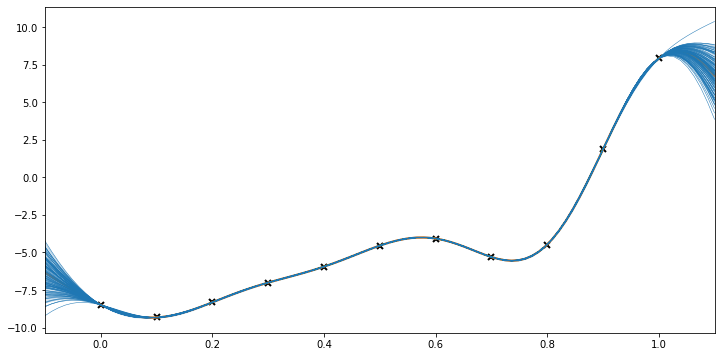

In [176]:
import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)  # test points must be of shape (N, D)


## predict mean and variance of latent GP at test points
mean_c, var_c = model_c.predict_f(xx)
mean, var=predict_c(xx)
## generate 10 samples from posterior
samples = model_c.predict_f_samples(xx, 100) # shape (10, 100, 1)

## plot 
plt.figure(figsize=(12, 6))
plt.plot(initial_data_c[OBJECTIVE].query_points[:], initial_data_c[OBJECTIVE].observations[:], 'kx', mew=2)
plt.plot(xx, mean_c, 'C0', label='predict_f',lw=2)
plt.plot(xx, mean, 'C1', label='predict_c', lw=2)
plt.fill_between(xx[:,0],
                 mean_c[:,0] - 1.96 * np.sqrt(var_c[:,0]),
                 mean_c[:,0] + 1.96 * np.sqrt(var_c[:,0]),
                 color='C0', alpha=0.2)

plt.plot(xx, samples[:, :, 0].T, 'C0', linewidth=.5)
plt.xlim(-0.1, 1.1);



## Viewing the fine model 

In [179]:
## fine model
k=gpflow.kernels.RBF()
theta=gpflow.kernels.Constant()
k_e=k+theta

mean=tf.math.reduce_mean(initial_data_e[OBJECTIVE].observations[:])
mean_function=gpflow.mean_functions.Constant(mean)
model_e=gpflow.models.GPR((initial_data_e[OBJECTIVE].query_points[:], initial_data_e[OBJECTIVE].observations[:]),k_e,mean_function)
optimizer = gpflow.optimizers.Scipy()
optimizer.minimize(model_e.training_loss,variables=model_e.trainable_variables,options=dict(disp=True, maxiter=100),)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.79003D+01    |proj g|=  3.93739D+01

At iterate    1    f=  4.94546D+01    |proj g|=  1.78369D+01

At iterate    2    f=  3.69584D+01    |proj g|=  9.56043D+00

At iterate    3    f=  2.67594D+01    |proj g|=  4.06466D+00

At iterate    4    f=  2.06289D+01    |proj g|=  1.66538D+00

At iterate    5    f=  1.85729D+01    |proj g|=  1.06051D+00

At iterate    6    f=  1.62661D+01    |proj g|=  5.19354D-01

At iterate    7    f=  1.50538D+01    |proj g|=  2.95959D-01

At iterate    8    f=  1.39980D+01    |proj g|=  1.52918D-01

At iterate    9    f=  1.37129D+01    |proj g|=  7.85712D-01

At iterate   10    f=  1.34873D+01    |proj g|=  3.26523D-01

At iterate   11    f=  1.33080D+01    |proj g|=  1.15075D-01

At iterate   12    f=  1.32152D+01    |proj g|=  1.19554D-01

At iterate   13    f=  1.3

 This problem is unconstrained.


      fun: 12.84044930796454
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.81498725e-05,  5.74559533e-06,  2.46762120e-05,  4.38014560e-07,
       -1.67186043e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 49
      nit: 42
     njev: 49
   status: 0
  success: True
        x: array([ -1.46481196,  41.56391349,  -7.23779602, -10.44209563,
         6.00716878])


At iterate   42    f=  1.28404D+01    |proj g|=  7.81499D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     49      1     0     0   7.815D-05   1.284D+01
  F =   12.840449307964541     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


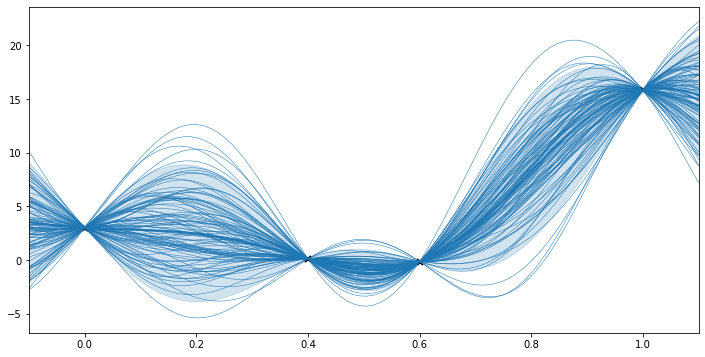

In [180]:
import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)  # test points must be of shape (N, D)


## predict mean and variance of latent GP at test points
mean_e, var_e = model_e.predict_f(xx)


## generate 100 samples from posterior
samples = model_e.predict_f_samples(xx, 100)  # shape (10, 100, 1)

## plot 
plt.figure(figsize=(12, 6))
plt.plot(initial_data_e[OBJECTIVE].query_points[:], initial_data_e[OBJECTIVE].observations[:], 'kx', mew=2)
plt.plot(xx, mean_e, 'C0', lw=2)
plt.fill_between(xx[:,0],
                 mean_e[:,0] - 1.96 * np.sqrt(var_e[:,0]),
                 mean_e[:,0] + 1.96 * np.sqrt(var_e[:,0]),
                 color='C0', alpha=0.2)

plt.plot(xx, samples[:, :, 0].T, 'C0', linewidth=.5)
plt.xlim(-0.1, 1.1);


# MF

In [181]:
X_e=initial_data_e[OBJECTIVE].query_points[:]
X_c=initial_data_c[OBJECTIVE].query_points[:]
Y_e=initial_data_e[OBJECTIVE].observations[:]
model_c_obs,_=model_c.predict_f(X_e)
n=num_initial_points_e


In [182]:
### we need to rebuild the likelihood function
import math

def neg_log_likelihood(par, X_e,Y_e,Y_c):
    Ro,l,var,theta, sigma_epsilon=par 
    dist_X_e = (X_e - X_e.T)**2
    k = var*np.exp(-(1/(2*(l**2)))*dist_X_e)+theta
    n=len(X_e)
    return -(-n/2*np.log(2*np.pi)-1/2*np.log(np.linalg.det(k+(sigma_epsilon**2)*np.eye(n)))-1/2*np.dot(np.dot(( Y_e.numpy()-Ro*Y_c.numpy()).T,np.linalg.inv(k+(sigma_epsilon**2)*np.eye(n))),(Y_e.numpy()-Ro*Y_c.numpy())))




In [183]:
from scipy.optimize import minimize 
start =  [0.1,0.1, 40,0.1,0.1]

min=minimize(neg_log_likelihood, start, args=(X_e,Y_e,model_c_obs), bounds=[(-np.inf,np.inf),(0e-4,2),(0,30**2),(-np.inf,np.inf),(0,1000)],method='L-BFGS-B',options = {'disp':True,'maxiter':1000})

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40578D+01    |proj g|=  2.04612D+00

At iterate    1    f=  1.22256D+01    |proj g|=  2.20596D+00

At iterate    2    f=  1.18534D+01    |proj g|=  1.48730D+00

At iterate    3    f=  1.17933D+01    |proj g|=  1.43044D+00

At iterate    4    f=  1.17125D+01    |proj g|=  9.21774D-01

At iterate    5    f=  1.16951D+01    |proj g|=  8.51399D-02

At iterate    6    f=  1.16889D+01    |proj g|=  9.44119D-02

At iterate    7    f=  1.16836D+01    |proj g|=  1.32725D-01

At iterate    8    f=  1.16822D+01    |proj g|=  8.50193D-02

At iterate    9    f=  1.16778D+01    |proj g|=  3.17372D-01

At iterate   10    f=  1.16718D+01    |proj g|=  5.88272D-01

At iterate   11    f=  1.16504D+01    |proj g|=  1.18586D+00

At iterate   12    f=  1.16016D+01    |proj g|=  1.42038D+00

At iterate   13    f=  1.1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   31    f=  8.72096D+00    |proj g|=  1.37443D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     63     32     1     1   1.374D+01   8.721D+00
  F =   8.7209613871818714     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [184]:

min.x
##Ro,l, variance, theta,  bruit 

array([  1.92133456,   1.76672503, 307.12761594, 400.38437807,
         0.        ])

In [185]:
## om recupere les parametres trouves et on calcule le kernel C_e(Theta_e)=k_MF

k=gpflow.kernels.RBF(min.x[2],min.x[1])
theta=gpflow.kernels.Constant(min.x[3])
k_MF=k+theta
#gpflow.set_trainable(k_e.variance, False)
#gpflow.set_trainable(k_e.lengthscales, False)
#mean=tf.math.reduce_mean(initial_data_e[OBJECTIVE].observations[:])
#mean_function=gpflow.mean_functions.Constant(mean)

#model_e=gpflow.models.GPR((initial_data_e[OBJECTIVE].query_points[:], initial_data_e[OBJECTIVE].observations[:]),k_e,mean_function)

In [186]:
k_MF

<gpflow.kernels.base.Sum object at 0x7fd196b7c6a0>
╒═════════════════════════════╤═══════════╤═════════════╤═════════╤═════════════╤═════════╤═════════╤═══════════╕
│ name                        │ class     │ transform   │ prior   │ trainable   │ shape   │ dtype   │     value │
╞═════════════════════════════╪═══════════╪═════════════╪═════════╪═════════════╪═════════╪═════════╪═══════════╡
│ Sum.kernels[0].variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │ 307.128   │
├─────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼───────────┤
│ Sum.kernels[0].lengthscales │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │   1.76673 │
├─────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼───────────┤
│ Sum.kernels[1].variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │ 400.384   │
╘═════════════════════════════╧═══════════╧═════════════╧═════════╧═════════════╧═════════╧═════════╧═══════════╛

In [187]:
## btuit 

sigma_epsilon=min.x[4]

## GP model matrix
K_bf_MF_inv=np.linalg.inv(k_MF(X_e)+sigma_epsilon**2*np.eye(n))
## vecteur de correlation

def K_MF(x):
#     if len(x)==1:
    if isinstance(x, np.float64):
        K=k_MF(x,initial_data_e[OBJECTIVE].query_points[:]).reshape(1,n)
    else:
        
        K=k_MF(x,initial_data_e[OBJECTIVE].query_points[:])
    return K.numpy().T
## coefficient de correlation
def k_coef_MF(x):
    if len(x)==1:
        return k_MF(x,x).numpy()
    else :
        return k_MF(x,x).numpy().diagonal().reshape((len(x),1))



def f_hat(x) :
    
    Y_e=initial_data_e[OBJECTIVE].observations[:]
    Y_c,var=predict_c(X_e)
    mean_c, var_c= predict_c(x)
    
    return (min.x[0]*mean_c+np.dot(np.dot(K_MF(x).T, K_bf_MF_inv),Y_e-min.x[0]*Y_c))
    #return  f_hat
def sigma_square_hat(x):
    mean_c, var_c= predict_c(x)
    
    if len(x)==1:
        
        return (pow(min.x[0],2)*var_c+sigma_epsilon**2+k_coef_MF(x)-np.dot(np.dot(K_MF(x).T, K_bf_MF_inv),K_MF(x)).reshape(len(x),1))
    else :
        return (pow(min.x[0],2)*var_c+sigma_epsilon**2+k_coef_MF(x)-np.dot(np.dot(K_MF(x).T, K_bf_MF_inv),K_MF(x)).diagonal().reshape(len(x),1))
    

In [188]:
sigma_square_hat(X_test[0])

array([[8.37239884e-06]])

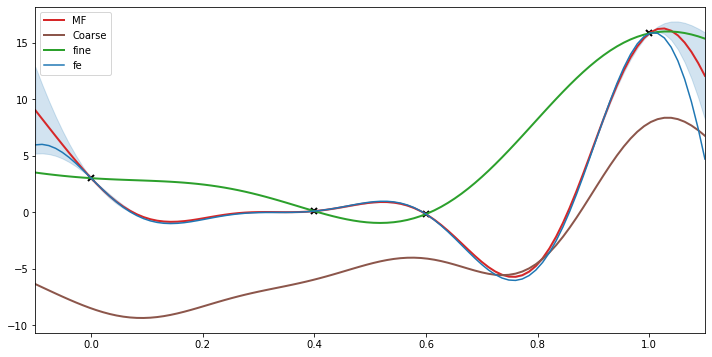

In [193]:

## plot 
plt.figure(figsize=(12, 6))
plt.plot(initial_data_e[OBJECTIVE].query_points[:], initial_data_e[OBJECTIVE].observations[:], 'kx', mew=2)
plt.plot(xx, f_hat(xx), 'C3', label='MF',lw=2)
#plt.plot(xx, mean_e, 'C2', label='HF',lw=2)
plt.plot(xx, mean_c, 'C5', label='Coarse',lw=2)
plt.plot(xx, mean_e, 'C2', label='fine',lw=2)
plt.plot(xx,fe(xx),'C0', label="fe")

plt.fill_between(xx[:,0],
                f_hat(xx)[:,0] - 1.96 * np.sqrt(sigma_square_hat(xx)[:,0]),
                f_hat(xx)[:,0] + 1.96 * np.sqrt(sigma_square_hat(xx)[:,0]),
                color='C0', alpha=0.2)

plt.legend()

plt.xlim(-0.1, 1.1);

## Bayesian optimisation with EGO

In [160]:
##   turn our MF-estimators into a gaussian Process
Ro=gpflow.kernels.Constant(min.x[0])
model_MF=gpflow.models.GPR((xx, f_hat(xx)),Ro*k_c+k_MF,noise_variance=1)

In [99]:
model_MF

<gpflow.models.gpr.GPR object at 0x7fd21c74f7c0>
╒══════════════════════════════════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤════════════╕
│ name                                                     │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │      value │
╞══════════════════════════════════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪════════════╡
│ GPR.kernel.kernels[0].kernels[0].variance                │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │   1.92133  │
├──────────────────────────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────┤
│ GPR.kernel.kernels[0].kernels[1].kernels[0].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │  37.7482   │
├──────────────────────────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────┤
│ GPR.kernel.kernels[0].kernels[1].kernels[0].lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │   0.177652 │
├──────────────────────────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────┤
│ GPR.kernel.kernels[0].kernels[1].kernels[1].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │   1.65096  │
├──────────────────────────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────┤
│ GPR.kernel.kernels[1].variance                           │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 307.128    │
├──────────────────────────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────┤
│ GPR.kernel.kernels[1].lengthscales                       │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │   1.76673  │
├──────────────────────────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────┤
│ GPR.kernel.kernels[2].variance                           │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 400.384    │
├──────────────────────────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────┤
│ GPR.likelihood.variance                                  │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │   1        │
╘══════════════════════════════════════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧═════════╧════════════╛

In [100]:
import trieste
from trieste.models.gpflow import build_gpr, GaussianProcessRegression
model={'OBJECTIVE':GaussianProcessRegression(model_MF),}


In [101]:
##current best 
x_best=initial_data_e[OBJECTIVE].query_points[int(tf.math.argmin(initial_data_e[OBJECTIVE].observations[:]))].reshape((1,1))


In [106]:
def u(x): ## il faut utiliser le type numpy x=np.array([[0.5]])
   
    return (f_hat(x_best)-f_hat(x))/np.sqrt(sigma_square_hat(x))

In [194]:
## expected improvement 
## for the highest fidelity level  
from scipy.stats import norm
def EI(x):
    return (np.sqrt(sigma_square_hat(x))*[u(x)*norm.cdf(u(x))+norm.pdf(u(x))]).reshape(x.shape)

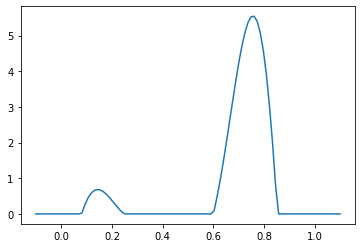

In [195]:
plt.plot(xx,EI(xx))

In [196]:
### merit function 
### for the highest fidelity level 
## to be updated 

def AEI_L(x):
    return (EI(x)*(1-sigma_epsilon/np.sqrt(sigma_square_hat(x)+sigma_epsilon**2)))

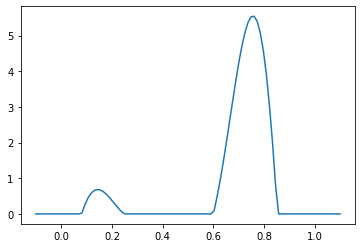

In [197]:
plt.plot(xx,AEI_L(xx))

# updates

In [198]:
ro=np.zeros(L-1)
ro[0]=min.x[0]
## Gaussian process model matrix 


def predictive_variance_update_NN(X,x_star,l_star=2):## X is  nD array 
    try:
        
        if isinstance(X,(np.float64,float)) :
            if l_star==1:
                M1= np.concatenate((K_c(X).T, k_c(X,x_star).numpy().reshape(1,1)),axis=1)
                array1=np.concatenate((k_c(X_c)+(sigma_epsilon_c)**2*np.eye(n_c),K_c(x_star)),axis=1) 
                array2=np.concatenate((K_c(x_star).T,k_coef_c(x_star)+sigma_epsilon**2),axis=1)                    
                M2=np.concatenate((array1,array2),axis=0)
                predictive_variance_update=np.dot(np.dot(M1,np.linalg.inv(M2)),M1.T)-np.dot(np.dot(K_c(x).T,K_bf_c_inv),K_c(x))
            elif l_star==2:
                M1= np.concatenate((K_MF(X).T, k_MF(X,x_star).numpy().reshape(1,1)),axis=1)
                array1=np.concatenate((k_MF(X_e)+(sigma_epsilon)**2*np.eye(n),K_MF(x_star)),axis=1) 
                array2=np.concatenate((K_MF(x_star).T,k_coef_MF(x_star)+sigma_epsilon**2),axis=1)                    
                M2=np.concatenate((array1,array2),axis=0)
                predictive_variance_update=np.dot(np.dot(M1,np.linalg.inv(M2)),M1.T)-np.dot(np.dot(K_MF(x).T,K_bf_MF_inv),K_MF(x))
            return predictive_variance_update
        ## x_star id 1D array
        elif len(X)==1:
            X=X.reshape(1,1)
            if l_star==1:
                M1= np.concatenate((K_c(X).T, k_c(X,x_star).numpy().reshape(1,1)),axis=1)
                array1=np.concatenate((k_c(X_c)+(sigma_epsilon_c)**2*np.eye(n_c),K_c(x_star)),axis=1) 
                array2=np.concatenate((K_c(x_star).T,k_coef_c(x_star)+sigma_epsilon**2),axis=1)                    
                M2=np.concatenate((array1,array2),axis=0)
                predictive_variance_update=np.dot(np.dot(M1,np.linalg.inv(M2)),M1.T)-np.dot(np.dot(K_c(x).T,K_bf_c_inv),K_c(x))
            elif l_star==2:
                M1= np.concatenate((K_MF(X).T, k_MF(X,x_star).numpy().reshape(1,1)),axis=1)
                array1=np.concatenate((k_MF(X_e)+(sigma_epsilon)**2*np.eye(n),K_MF(x_star)),axis=1) 
                array2=np.concatenate((K_MF(x_star).T,k_coef_MF(x_star)+sigma_epsilon**2),axis=1)                    
                M2=np.concatenate((array1,array2),axis=0)
                predictive_variance_update=np.dot(np.dot(M1,np.linalg.inv(M2)),M1.T)-np.dot(np.dot(K_MF(x).T,K_bf_MF_inv),K_MF(x))
            return predictive_variance_update
    except  TypeError:
        print('check dimension')
        
        
### nested case
def predictive_variance_update_N(X,x_star,l_star=2):## x doit etre un np.array
    
    s=0
    for l in range(1,l_star+1):
        P=1
        if l<(L) :
            for j in range(l):
                P*=ro[j]**2
        s+=P*predictive_variance_update_NN(X,x_star,l)
        
    return s 

In [199]:
predictive_variance_update_NN(X_test[0],x_star,1)

array([[0.26459837]])

In [200]:
def max_(a,X):
    L=np.zeros((len(X),1))
    for i in range(len(X)):
        if(float(X[i])>a) :
            L[i]=X[i]
        else:
            L[i]=a
    return L

In [201]:
W=np.ones(L)
W[0]=1
W[1]=101

def MF_AEI_N(x,l=2):
    if isinstance(x, (np.float64, float)):
        update=predictive_variance_update_N(x,x,l)/sigma_square_hat(x)
    else: 
        update=np.zeros((len(x),1))
        for i in range(len(x)):
            update[i]=predictive_variance_update_N(x[i].reshape(1,1),x[i].reshape(1,1),l)/sigma_square_hat(x[i].reshape(1,1))
    return AEI_L(x)*sum(W)/sum(W[:l])*max_(0,update)

In [202]:
def MF_AEI_N_2(x):
    return MF_AEI_N(x,2)
def MF_AEI_N_1(x):## another update is to add the fidelity level l as an argument of the function 
    return MF_AEI_N(x,1)

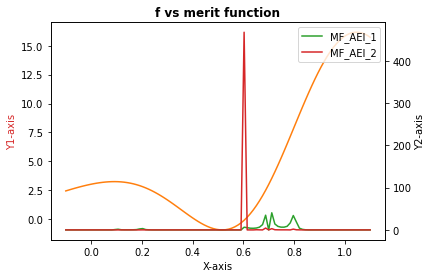

In [204]:
fig, ax1 = plt.subplots()  
mean_MF, var_MF = model_MF.predict_f(xx)  
color = 'tab:red'
ax1.set_xlabel('X-axis')  
ax1.set_ylabel('Y1-axis', color = color)  
ax1.plot(xx, mean_MF, color = "C1",label='MF')  
ax1.tick_params(axis ='y')  
  
ax2 = ax1.twinx()  
  
color = 'tab:green'
ax2.set_ylabel('Y2-axis')  
ax2.plot(xx, MF_AEI_N_1(xx), color = 'C2',label="MF_AEI_1") 
color = 'tab:blue'
ax2.plot(xx, MF_AEI_N_2(xx), color = 'C3',label="MF_AEI_2") 
ax2.tick_params(axis ='y')  
  
plt.title('f vs merit function', fontweight ="bold")  
plt.legend() 
plt.show()


## optimisation 

In [132]:
# from scipy.optimize import basinhopping
# from scipy.optimize import minimize
# x_0 =np.array([[0.1]])
# def neg_MF_AEI_N_2(x):
#     return -MF_AEI_N_2(x)
# #min=basinhopping(neg_MF_AEI_N_2, x_0, niter=100, minimizer_kwargs={'bounds':(0,1)})
# min=minimize(neg_MF_AEI_N_2, x_0, args=(),bounds=[(0.,1.)],method='L-BFGS-B',options = {'disp':True,'maxiter':1000})

TypeError: 'int' object is not iterable

## optimisation using Trieste ( the part to be fixed)

sol(1) : optimising directly over the new acquisition function 

In [205]:
## since we don"t have  many fidelity level L=2, i can fix l and optimise only over x, and then choose over the two optimum, the one that gives the highest acquisition function value 
## or, Can we optimize over x and l at the same time 

## as a first test , i only built an acquisition function  class for l=2 
from trieste.acquisition.rule import EfficientGlobalOptimization
from trieste.acquisition import (
    SingleModelAcquisitionBuilder,
    AugmentedExpectedImprovement,Product
)
class Nested_merit_function_2(SingleModelAcquisitionBuilder):
    def prepare_acquisition_function(self, model, dataset=None):
        def acquisition(at):
            
            return MF_AEI_N_2(at)
        return acquisition 
acq_fun=Nested_merit_function_2().using(OBJECTIVE)  
rule = EfficientGlobalOptimization(acq_fun)

In [206]:
bo = trieste.bayesian_optimizer.BayesianOptimizer(observer_e, search_space)

num_steps = 20
result = bo.optimize(
    num_steps, initial_data_e, model, rule
).final_result.unwrap()

arg_min_idx = tf.squeeze(
    tf.argmin(result.datasets[OBJECTIVE].observations, axis=0)
)
print(f"query point: {result.datasets[OBJECTIVE].query_points[arg_min_idx, :]}")


Optimization failed at step 0, encountered error with traceback:
Traceback (most recent call last):
  File "/user/mouali/home/.local/lib/python3.10/site-packages/trieste/bayesian_optimizer.py", line 468, in optimize
    points_or_stateful = acquisition_rule.acquire(
  File "/user/mouali/home/.local/lib/python3.10/site-packages/trieste/acquisition/rule.py", line 261, in acquire
    points = self._optimizer(search_space, self._acquisition_function)
  File "/user/mouali/home/.local/lib/python3.10/site-packages/trieste/acquisition/optimizer.py", line 98, in automatic_optimizer_selector
    return generate_continuous_optimizer(
  File "/user/mouali/home/.local/lib/python3.10/site-packages/trieste/acquisition/optimizer.py", line 244, in optimize_continuous
    target_func_values = target_func(tiled_candidates)  # [num_samples, V]
  File "/tmp/ipykernel_3839710/4285246197.py", line 12, in acquisition
    return MF_AEI_N_2(at)
  File "/tmp/ipykernel_3839710/2418680812.py", line 2, in MF_AEI_N

ValueError: shapes (11,11) and (11,1,5000) not aligned: 11 (dim 1) != 1 (dim 1)

sol(2): using the Augmented expected improvement in Trieste and adding the cost function and the predicitve variance update 

In [ ]:
from trieste.acquisition.rule import EfficientGlobalOptimization
from trieste.acquisition import (
    SingleModelAcquisitionBuilder,
    AugmentedExpectedImprovement,
    Product,
)


class PredictiveVarianceUpdate(SingleModelAcquisitionBuilder):
    def prepare_acquisition_function(self, model, dataset=None):
        def acquisition(at):
            
            
        return predicitve_variance_update_N(x,x,2)
    return acquisition 
class Cost(SingleModelAcquisitionBuilder):
    def prepare_acquisition_function(self, model, dataset=None):
        def acquisition(l):
            sum(W)/sum(W[:l])
            
        return 
    return acquisition 
ei = AugmentedExpectedImprovement()
pvu = PredictiveVarianceUpdate()
cost=Cost()
acq_fn = Product(ei.using(OBJECTIVE), pvu.using(OBJECTIVE),Cost)
## i need to add the cost function which is basically the ratio between the total cost of the new evaluation and the cost of selecting systematically the highest fidelity level L 
rule = EfficientGlobalOptimization(acq_fn)  # type: ignore


In [ ]:
bo = trieste.bayesian_optimizer.BayesianOptimizer(observer_e, search_space)

num_steps = 20
result = bo.optimize(
    num_steps, initial_data_e, model, rule
).final_result.unwrap()

arg_min_idx = tf.squeeze(
    tf.argmin(result.datasets[OBJECTIVE].observations, axis=0)
)
print(f"query point: {result.datasets[OBJECTIVE].query_points[arg_min_idx, :]}")